<a href="https://colab.research.google.com/github/manasamorthad/Machine-Learning/blob/main/ML_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1**.**Regression**

For this exercise, you will experiment with regression, regularization, and cross-validation. Choose
appropriate Dataset.

In [18]:
import pandas as pd
import numpy as np

**(a) Load the data into memory. Make an appropriate X matrix and y vector**

In [19]:
df=pd.read_csv("/content/WineQT.csv")
df.shape

(1143, 13)

In [20]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [21]:
[col for col in df.columns if df[col].isnull().sum()>0] #check if there is null data

[]

In [22]:
df=df.drop_duplicates()
df.shape

(1143, 13)

In [23]:
X = df.drop(['quality', 'Id'], axis=1) #input variables
y=df['quality'] #output variable

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

**(b) Split the data at random into one set (Xtrain, ytrain) containing 80% of the instances, which will
be used for training + validation, and a testing set Xtest, ytest) (containing remaining instances)**

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

**(c) Give the objective of logistic regression with L2 regularization.**

1.Logistic regression is used for classification and predicts probabilities using the sigmoid function.

2.The model normally minimizes the cross-entropy loss (negative log-likelihood).

3.L2 regularization adds a penalty term that is the sum of squared weights.

4.The new loss function becomes:

Loss=Cross-Entropy Loss+2λ​i=1∑n​wi2​


5.λ is the regularization parameter:

Large
𝜆

λ → stronger penalty, smaller weights, less overfitting, but higher bias.

Small
𝜆

λ → weaker penalty, model fits more closely, but higher risk of overfitting.

6.The purpose is to control model complexity and improve generalization.

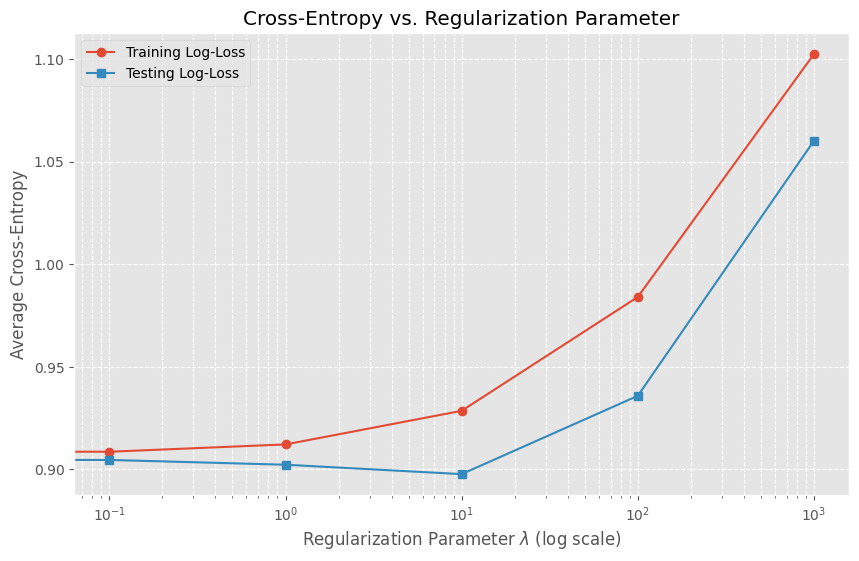

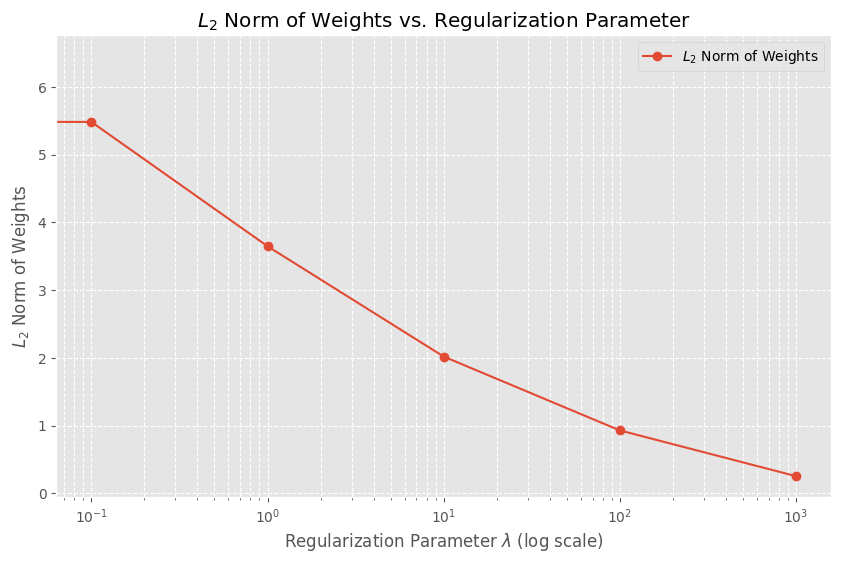

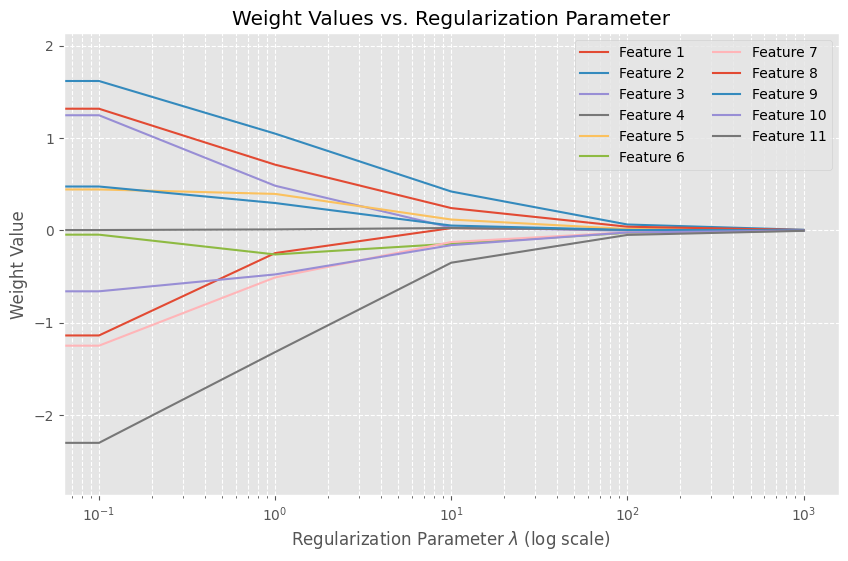

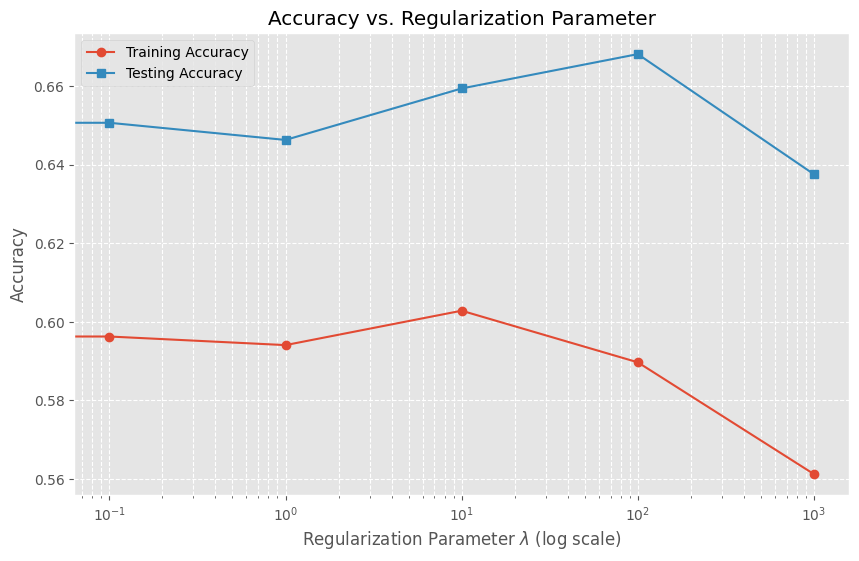

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

# Define the regularization parameters (lambda values)
lambda_values = [0, 0.1, 1, 10, 100, 1000]

# Initialize lists to store metrics
train_losses = []
test_losses = []
l2_norms = []
all_weights = []
train_accuracies = []
test_accuracies = []

# Run logistic regression for each lambda value
for lam in lambda_values:
    # C is the inverse of lambda.
    # We use a very large C for lam=0 to simulate no regularization.
    if lam == 0:
        model = LogisticRegression(penalty='l2', C=1e10, solver='lbfgs', max_iter=5000)
    else:
        model = LogisticRegression(penalty='l2', C=1/lam, solver='lbfgs', max_iter=5000)

    # Train the model
    model.fit(X_train, y_train)

    # Get predictions and probabilities
    y_train_proba = model.predict_proba(X_train)
    y_test_proba = model.predict_proba(X_test)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate and store metrics
    train_losses.append(log_loss(y_train, y_train_proba))
    test_losses.append(log_loss(y_test, y_test_proba))

    # Calculate L2 norm of the weight vector
    l2_norms.append(np.linalg.norm(model.coef_))

    # Store the actual weights. The shape is (num_classes, num_features)
    all_weights.append(model.coef_.flatten())

    # Calculate and store accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Plot the results
plt.style.use('ggplot')

# Plot 1: Average Cross-Entropy (Log-Loss)
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, train_losses, label='Training Log-Loss', marker='o')
plt.plot(lambda_values, test_losses, label='Testing Log-Loss', marker='s')
plt.xscale('log')
plt.xlabel(r'Regularization Parameter $\lambda$ (log scale)')
plt.ylabel('Average Cross-Entropy')
plt.title('Cross-Entropy vs. Regularization Parameter')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Plot 2: L2 Norm of the Weight Vector
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, l2_norms, label=r'$L_2$ Norm of Weights', marker='o')
plt.xscale('log')
plt.xlabel(r'Regularization Parameter $\lambda$ (log scale)')
plt.ylabel(r'$L_2$ Norm of Weights')
plt.title(r'$L_2$ Norm of Weights vs. Regularization Parameter')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Plot 3: Actual Values of Weights
plt.figure(figsize=(10, 6))
# Transpose the list of weights to plot each feature's weight over lambda
weights_transposed = np.array(all_weights).T
num_features = X_train.shape[1]
for i in range(num_features):
    plt.plot(lambda_values, weights_transposed[i], label=f'Feature {i+1}')
plt.xscale('log')
plt.xlabel(r'Regularization Parameter $\lambda$ (log scale)')
plt.ylabel('Weight Value')
plt.title('Weight Values vs. Regularization Parameter')
plt.legend(loc='upper right', ncol=2)
plt.grid(True, which="both", ls="--")
plt.show()

# Plot 4: Accuracy on Training and Test Sets
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(lambda_values, test_accuracies, label='Testing Accuracy', marker='s')
plt.xscale('log')
plt.xlabel(r'Regularization Parameter $\lambda$ (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Regularization Parameter')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()



Observations from the Plots
Plot 1: Cross-Entropy vs. λ

Overfitting at low λ: When λ is very small (close to 0), the training loss is much lower than the testing loss. This indicates that the model is fitting the training data too well, including its noise, which is the definition of overfitting.

Optimal Performance: The testing loss is at its lowest point for an intermediate value of λ (around λ=1). This is the best value for your model, as it has found a good balance between fitting the data and generalizing to new, unseen data.

Underfitting at high λ: As λ becomes very large, both the training and testing losses increase. The model becomes too simple to capture the underlying patterns in the data, a condition known as underfitting.

Plot 2: L
2
​
  Norm vs. λ

Shrinking Weights: As λ increases, the L
2
​
  norm of the weight vector decreases sharply. This is the intended effect of L
2
​
  regularization, which penalizes large weights and forces them to shrink.

Plot 3: Weight Values vs. λ

Magnitude Reduction: The plot shows that as λ increases, the magnitude of each individual weight decreases, moving them closer to zero.

No Feature Elimination: Unlike L
1
​
  regularization, L
2
​
  regularization reduces the weight values but does not force them to become exactly zero. This means all features still contribute to the model's prediction, albeit with smaller coefficients.

Plot 4: Accuracy vs. λ

Peak Test Accuracy: The training accuracy generally decreases as λ increases, while the testing accuracy peaks at an intermediate value.

Optimal Regularization: The highest testing accuracy occurs at the same λ value where the testing loss was lowest. This point represents the best model for this problem, as it has the highest predictive power on unseen data.